## Bike Sharing Assignment

### Problem Statement:
To understand the factors on which the demand for these shared bikes depends. Specifically, **BoomBikes** want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
*****
### Procedure:
1. Step 1: Reading and Understanding the Data (EDA)
2. Step 2: Visualising the Data
3. Step 3: Data Preparation
4. Step 4: Splitting the Data into Training and Testing Sets
5. Step 5: Building a linear model
6. Step 6: Residual Analysis of the train data
7. Step 7: Making Predictions Using the Final Model
8. Step 8: Model Evaluation

In [2]:
import numpy as np
import pandas as pd
import warnings # removes all warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# reading Bike csv dataset
bike = pd.read_csv("day.csv")
bike.head(7)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510


In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- Date is an object, and the rest are in numeric.
- It shows that there are no missing values, but we will check again. 
- Also variable like `weekday`, `mnth`, and `season` are catogorys in number format. 

In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike.shape

(730, 16)

In [7]:
round((bike.isnull().sum()/len(bike.index))*100, 2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

- Here, we can see that we have **no null values**

In [8]:
bike.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

- Here, we can see that each variable has **two or more unique values**, which is fine, and we don't have to remove any columns.

In [9]:
bike.drop_duplicates(subset=None, inplace=True)
bike.shape

(730, 16)

- There are no duplicate values because the original bike has 730 rows and the current shape also has the same rows.

In [10]:
bike = bike.drop("instant", axis=1)

- **instant** is just a index and it's no use for us. 

#####  From the data, we can see the `dteday` is an actual date and its divided into two columns `yr(year)` and `mnth(month)`
- So we will remove the **dteday** because it's already there. 

In [11]:
bike = bike.drop("dteday", axis=1)
bike.sample()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
167,2,0,6,0,5,1,1,26.615847,30.01915,73.5833,9.582943,863,3981,4844


#### We know that column `**cnt**` is the sum of `**casual and registered**`
- So we don't need these two columns (`**casual and registered**`)

In [12]:
bike = bike.drop(["casual", "registered"], axis=1)
bike.sample()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
67,1,0,3,0,3,1,2,12.129153,14.3304,77.5417,14.75005,1891


***

## Step 2: Visualising the Data

- To make visualization easy, I will replace all the categorical values like 1,0 and others to their original format. 

In [13]:
bike_visu = bike.copy()
bike_visu.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### For yr:

In [14]:
bike_visu.yr = bike_visu.yr.astype(str).map({"1":"2019", "0":"2018"})
bike_visu.yr.value_counts()

2019    365
2018    365
Name: yr, dtype: int64

#### For holiday:

In [15]:
bike_visu.holiday = bike_visu.holiday.astype(str).map({"1":"Holiday", "0":"Not holiday"})
bike_visu.holiday.value_counts()

Not holiday    709
Holiday         21
Name: holiday, dtype: int64

#### For workingday:

In [16]:
bike_visu.workingday = bike_visu.workingday.astype(str).map({"1":"Working day", "0":"Not working day"})
bike_visu.workingday.value_counts()

Working day        499
Not working day    231
Name: workingday, dtype: int64

#### For weathersit

In [17]:
bike_visu.weathersit = bike_visu.weathersit.astype(str).map({"1":"Clear", "2":"Mist + Broken clouds", "3":"Light Rain + Scattered clouds"})
bike_visu.weathersit.value_counts()

Clear                            463
Mist + Broken clouds             246
Light Rain + Scattered clouds     21
Name: weathersit, dtype: int64

#### For season:

In [18]:
bike_visu.season = bike_visu.season.astype(str).map({"1":"spring", "2":"summer", "3":"fall", "4":"winter"})
bike_visu.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

#### For weekday:
- When the date is 01-01-2018 and the weekday is 6, then it means 6 is Monday, and 0 is Tuesday

In [19]:
bike_visu.weekday = bike_visu.weekday.astype(str).map({"0":"Tue", "1":"Wed", "2":"Thus", "3":"Fri", "4":"Sat", "5":"Sun", "6":"Mon"})
bike_visu.weekday.value_counts()

Wed     105
Tue     105
Mon     105
Thus    104
Sun     104
Sat     104
Fri     103
Name: weekday, dtype: int64

#### For mnth:

In [20]:
bike_visu["mnth"].replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike_visu.mnth.value_counts()

Oct    62
May    62
Dec    62
Mar    62
Aug    62
Jul    62
Jan    62
Jun    60
Sep    60
Nov    60
Apr    60
Feb    56
Name: mnth, dtype: int64

*********

In [21]:
def plotpie_multi(plt, data, col):
    """
    Used for plotting Pie plots, it will return plt and can be used for multiple plots.
    """
    count_val = data[col].value_counts()
    explode = np.zeros(len(count_val))
    explode[0] = 0.04
    plt.pie(count_val, labels=count_val.keys(), autopct='%1.1f%%', explode=explode, shadow=True, startangle=50, textprops = {"fontsize":12})
    plt.title(col, fontname="Times New Roman", size=20, fontweight="bold")
    return plt

## Univarent Analysis
#### Visualising Categorical Variables

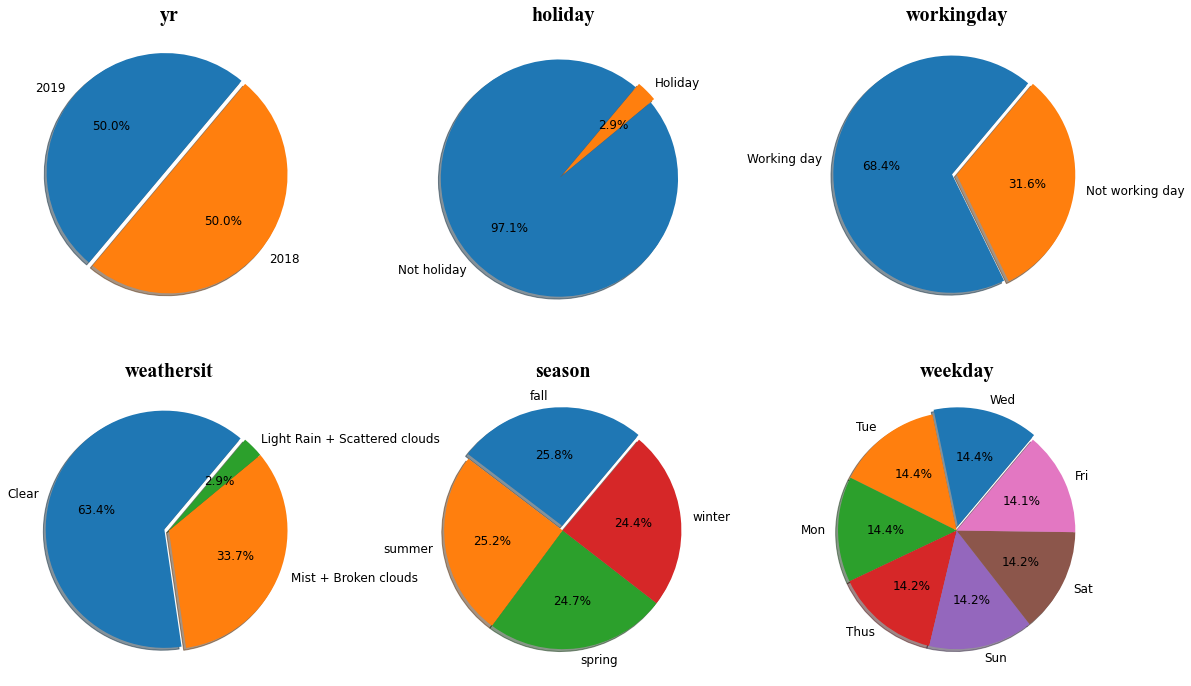

In [22]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt = plotpie_multi(plt, bike_visu, "yr")
plt.subplot(2,3,2)
plt = plotpie_multi(plt, bike_visu, "holiday")
plt.subplot(2,3,3)
plt = plotpie_multi(plt, bike_visu, "workingday")
plt.subplot(2,3,4)
plt = plotpie_multi(plt, bike_visu, "weathersit")
plt.subplot(2,3,5)
plt = plotpie_multi(plt, bike_visu, "season")
plt.subplot(2,3,6)
plt = plotpie_multi(plt, bike_visu, "weekday")
plt.show()

- In two years span, there is only 2.9% holiday, and the rest are nonholiday. 
- However, 68.4% is a working day, and 31.6% is a non-working day.
- Most of the time (63.4%), it's a clear sky, and rarely (2.9%) is a thunderstorm.

#### Visualising Numeric Variables

In [23]:
bike.temp.corr(bike.atemp)

0.9916961786905648

#### We know that:
- **temp : temperature in Celsius**
- **atemp: feeling temperature in Celsius**
- There correlation is around 1(0.99)
- I prefer to remove **temp** because people care how it feels like than the actual temperature. How it feels like doesn't depend only on temperature, it depends on all (weather, humidity and so on)
- However, I m not 100% sure to remove it. I will remove it when one shows statistically lower than the other when building the model. 

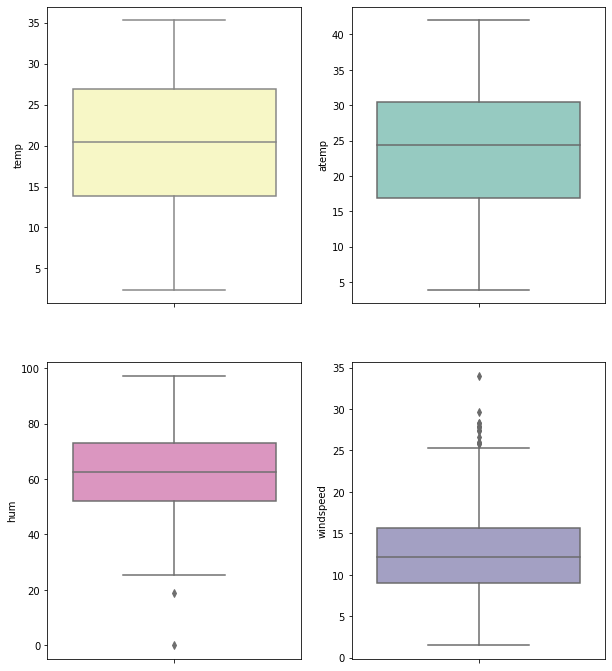

In [24]:
plt.figure(figsize=(10, 12))
plt.subplot(2,2,1)
sns.boxplot(y="temp", data=bike_visu, palette="Spectral")
plt.subplot(2,2,2)
sns.boxplot(y="atemp", data=bike_visu, palette="Set3")
plt.subplot(2,2,3)
sns.boxplot(y="hum", data=bike_visu, palette="Set2_r")
plt.subplot(2,2,4)
sns.boxplot(y="windspeed", data=bike_visu, palette="Purples_r")
plt.show()


- For `hum` and `windspeed` has some outliers.
- `temp`and `atem` is almost identical with different mean of 20 and 25.

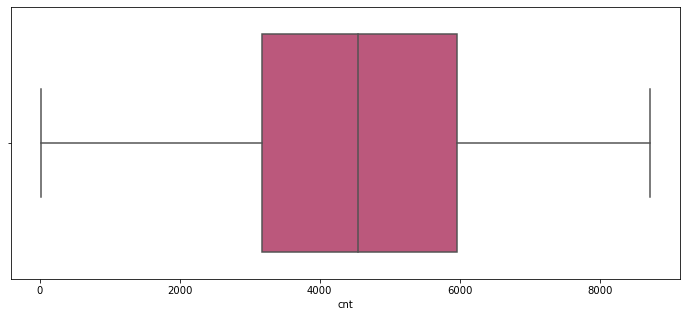

In [25]:
plt.figure(figsize=(12,5))
sns.boxplot(x="cnt", data=bike_visu, palette="plasma")
plt.show()

- For `cnt` Most of the values lies between 3000 to 6000 and with no outliers. 

## Bivarent analysis

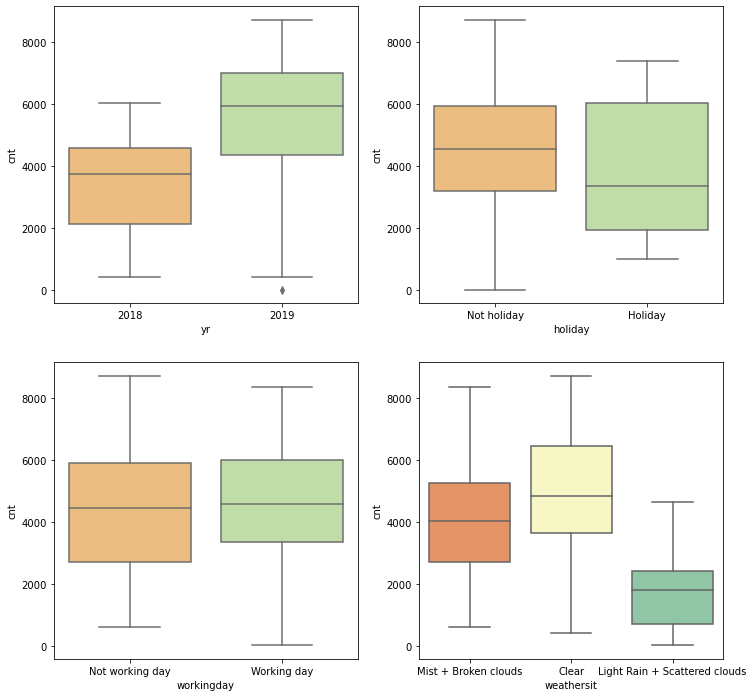

In [26]:
plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
sns.boxplot(x ="yr", y="cnt", data=bike_visu, palette="Spectral")
plt.subplot(2,2,2)
sns.boxplot(x ="holiday", y="cnt", data=bike_visu, palette="Spectral")
plt.subplot(2,2,3)
sns.boxplot(x ="workingday", y="cnt", data=bike_visu, palette="Spectral")
plt.subplot(2,2,4)
sns.boxplot(x ="weathersit", y="cnt", data=bike_visu, palette="Spectral")
plt.show()

1. `cnt vs. yr`: 
    - 2018 mean is around 4k, and 2019 mean 6k.
    - `Insight`:This means in 2019, more people took bike rides. 
2. `cnt vs. holiday`:
    - **Not holiday** have a mean of 4.5k, and **holiday** means around 3.3k.
    - `Insight`:  most people borrow the bike on a nonholiday than a holiday. 
3. `cnt vs. workingday`:
    - Nonworking days and working days have a similar mean and 75th percentile, but nonworking days have higher upper whiskers.
    - `Insight`:Which means there is a slight chance that people will borrow bikes more on a nonworking day. 
4. `cnt vs weathersit`:
    - `Insight`: We can see that people don't prefer to rent on thunderstorms most of the time. And Most people rent it in clear weather. 

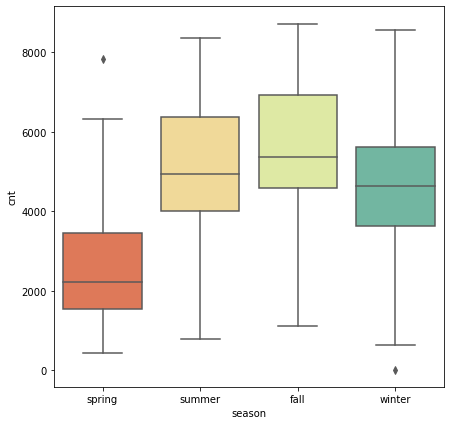

In [27]:
plt.figure(figsize=(7, 7))
sns.boxplot(x ="season", y="cnt", data=bike_visu, palette="Spectral")
plt.show()

##### `cnt vs season`: 
- Most people tend to rent bikes in the fall and summer. 
- And people prefer to book less in spring.

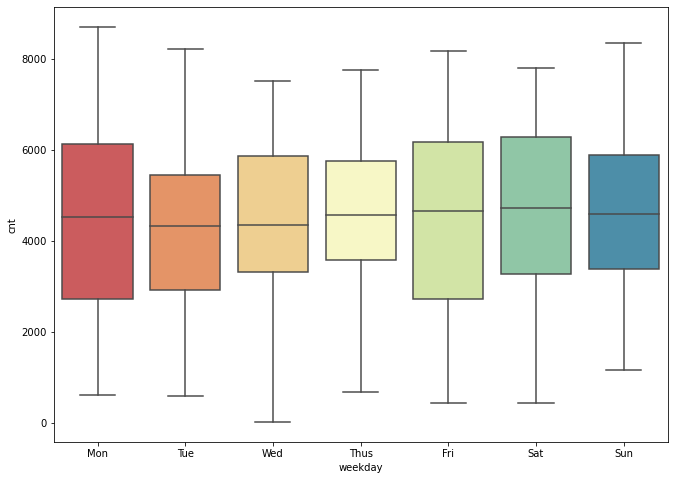

In [28]:
plt.figure(figsize=(11, 8))
sns.boxplot(x ="weekday", y="cnt", data=bike_visu, palette="Spectral")
plt.show()

##### `cnt vs weekdays`:
- Mean are the same for all weekdays.
- But Wednesday has more chance of booking less the other weekday.
- And Monday has a high probability of renting a bike.

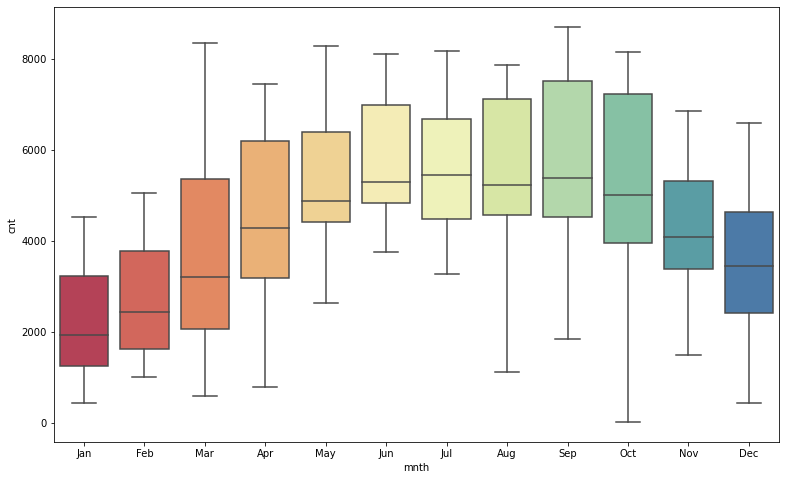

In [29]:
plt.figure(figsize=(13, 8))
sns.boxplot(x ="mnth", y="cnt", data=bike_visu, palette="Spectral")
plt.show()

`cnt  vs mnth`:
- People prefer to rent a bike between May to October.
- And gradually decrease from December to Feb. 

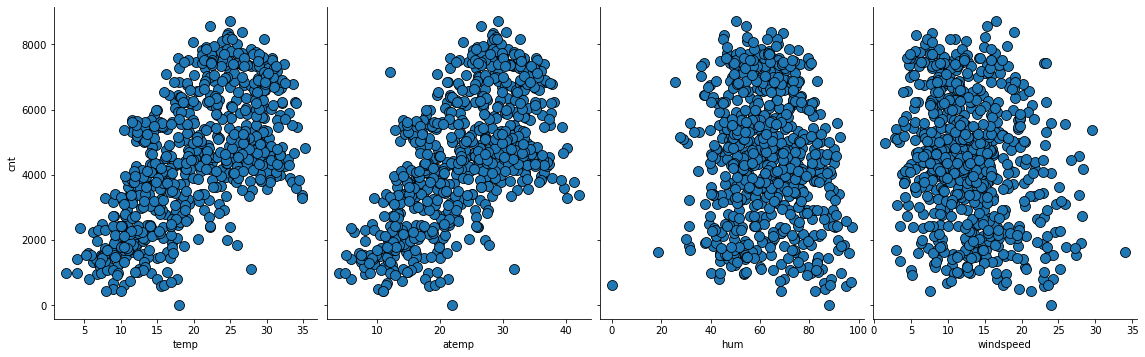

In [30]:
ax = sns.pairplot(data = bike_visu, y_vars = 'cnt', x_vars=["temp", "atemp", "hum", "windspeed"] , diag_kind = 'kde',
             plot_kws = {'alpha': 1.0, 's': 100, 'edgecolor': 'k'}, 
             height = 5)
ax.fig.set_size_inches(16,5)
plt.show()

- `temp` and `atemp` have a high correlation with `cnt,` but we can see when the `temp` is around 36+ people tend to rent bikes less ane temp between 20-33 people tend to book more. 
- When `hum` is between 40-85 people rent bikes more. 
- When `windspeed` is between 5-25 people rent bikes more.

## Multivarent Analysis

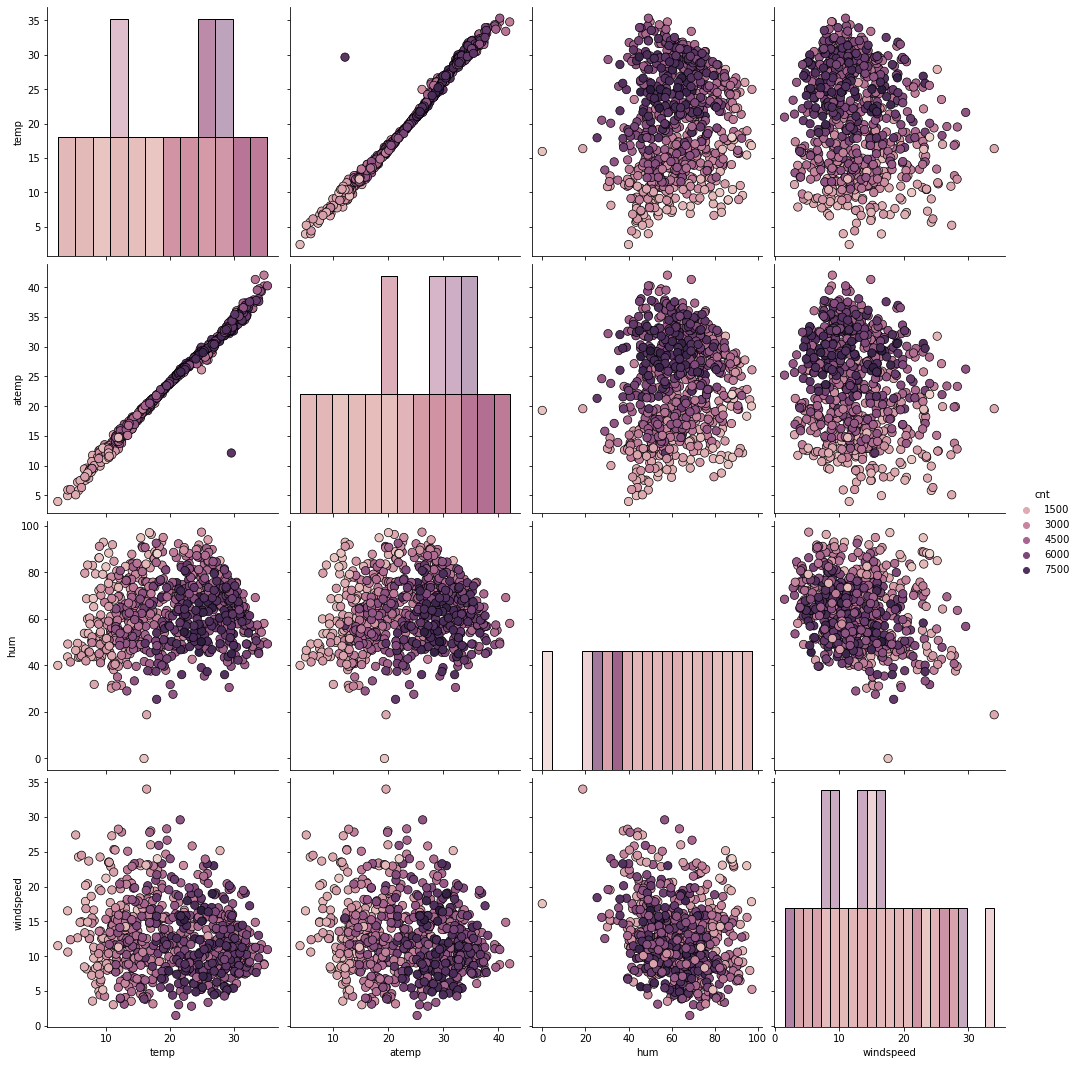

In [31]:
g = sns.pairplot(data = bike_visu, hue = 'cnt', vars=["temp", "atemp", "hum", "windspeed"] , diag_kind = 'hist',
             plot_kws = {'alpha': 1.0, 's': 70, 'edgecolor': 'k'},
             height = 4)
g.fig.set_size_inches(15,15)
plt.show()

1. `temp vs. cnt vs. windspeed`:
    - Most people rent bikes more when the temp is between 20-35 with a wind speed of 5-20.
2. `temp vs. hum vs. cnt`:
    - people rent bikes more when the temp is between 20-35, with the hum between 40-80.
3. `hum vs. cnt vs. windspeed`:
    - people rent bikes more when the hum is between 40-75, with windspeed between 5-20. 

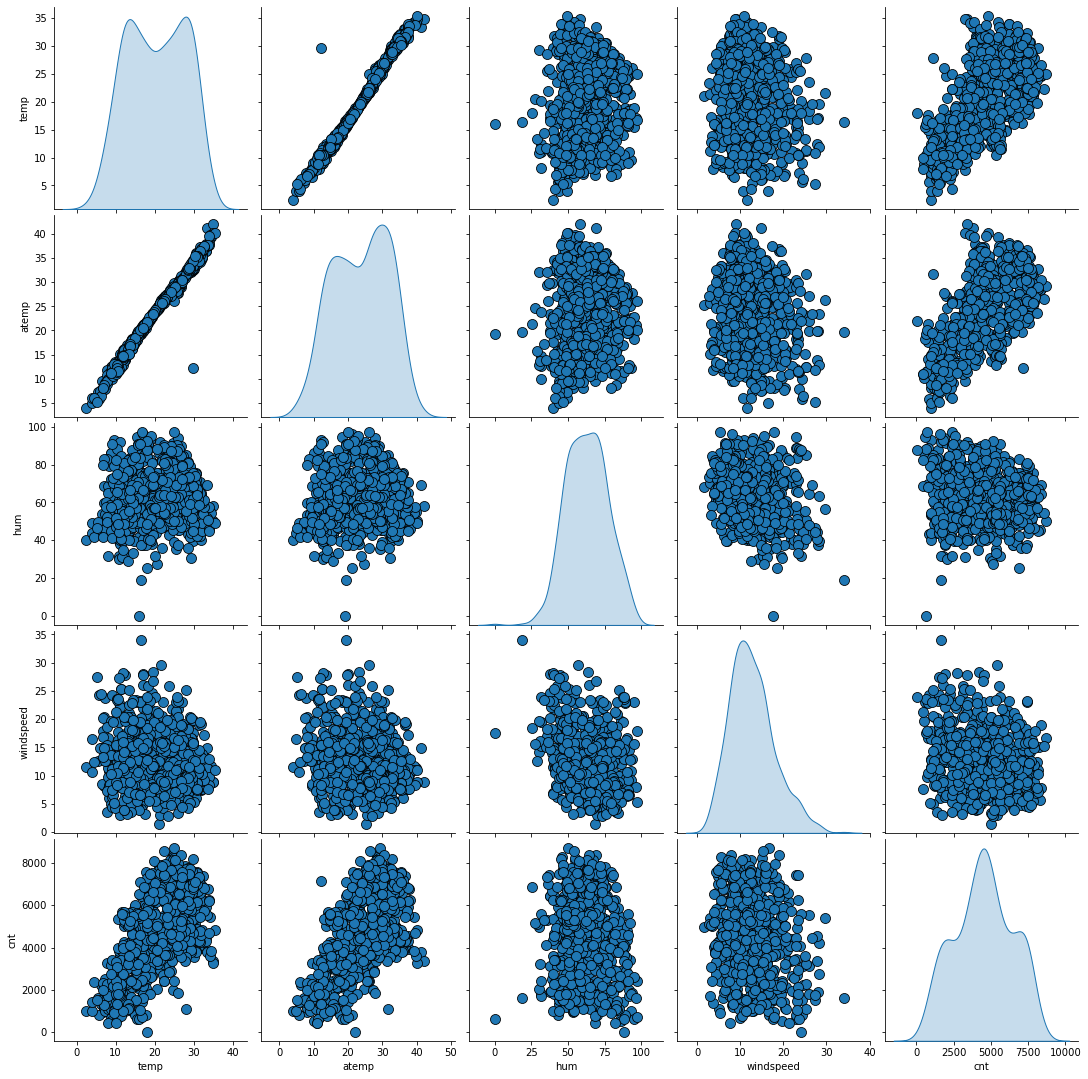

In [32]:
g = sns.pairplot(data = bike[['temp','atemp','hum','windspeed','cnt']], diag_kind = 'kde',
             plot_kws = {'alpha': 1.0, 's': 100, 'edgecolor': 'k'},
             height = 5)
g.fig.set_size_inches(15,15)
plt.show()

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


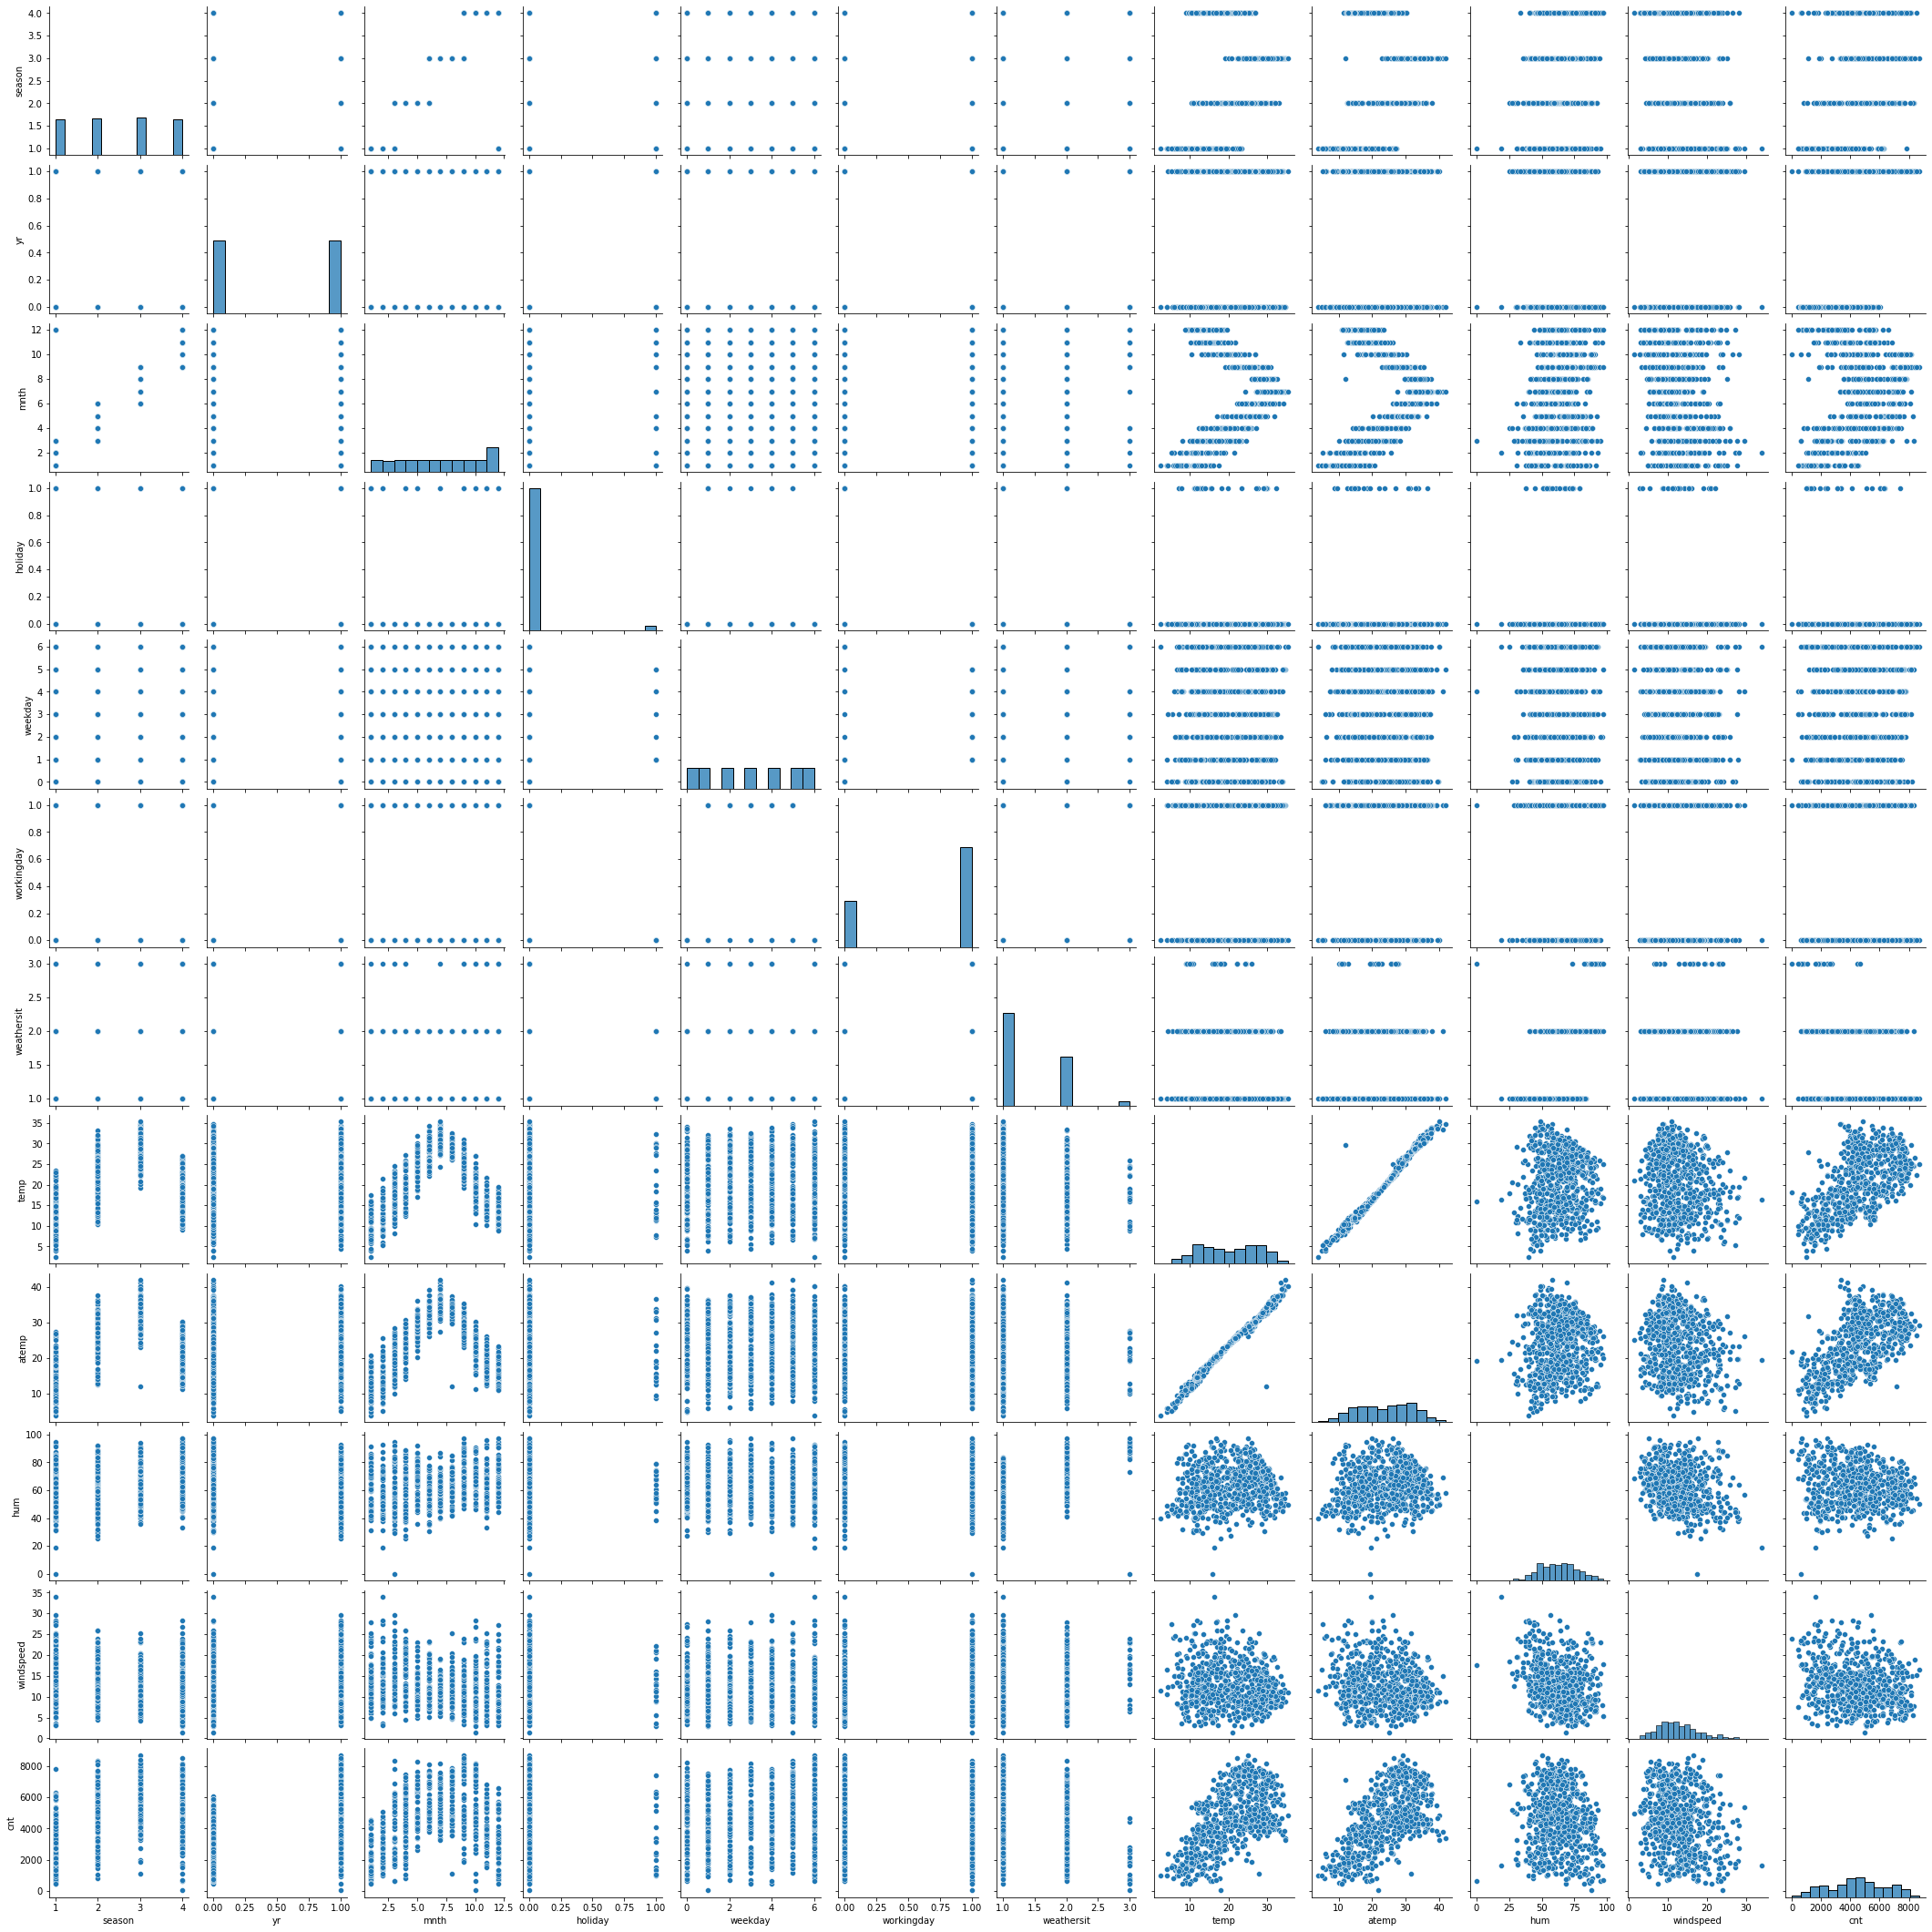

In [33]:
print(bike.columns)
sns.pairplot(bike)
plt.show()

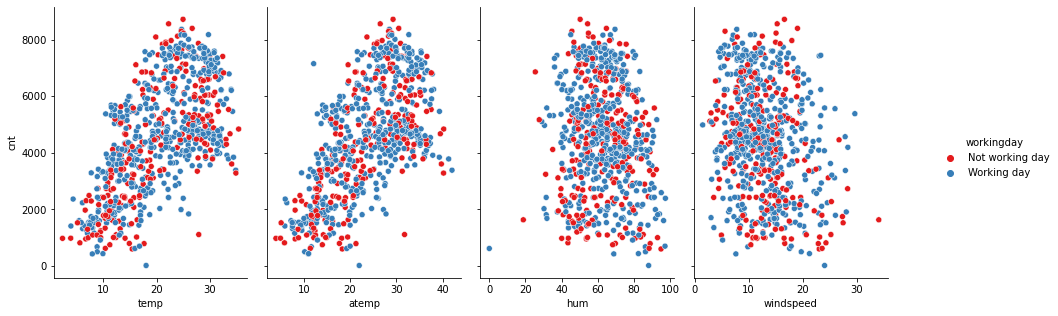

In [34]:
# Checking the impact of workingday against the numerical variable
ax = sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bike_visu, hue='workingday', palette='Set1')
ax.fig.set_size_inches(15,5)
plt.show()

- Distribution is kinda same for all

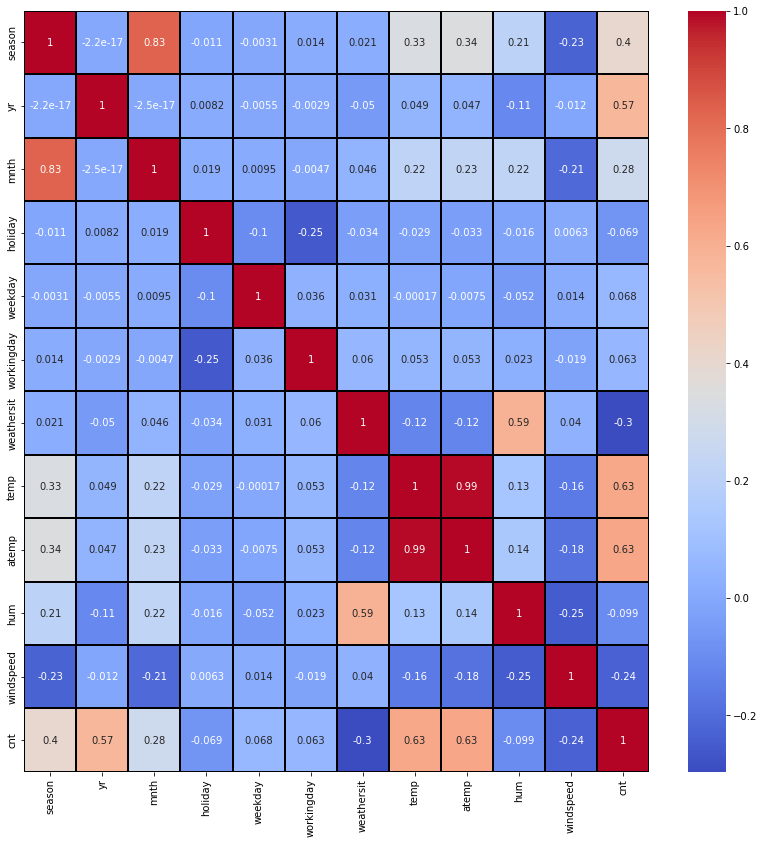

In [35]:
plt.figure(figsize=(14,14))
sns.heatmap(bike.corr(), cmap="coolwarm", annot=True, linecolor="black", linewidths=1)
plt.show() 

- `season`, `mnth`, `temp`, `atemp` and `yr` shows high correlation with `cnt`
- `weathersit`, `hum` and `windspeed` show high inverse correlation with `cnt`
*****

## Step 3: Data Preparation
- Create dummy variable for weathersit, season, weekday and mnth.

In [36]:
# creating dummy variable for weathersit
weathersit = pd.get_dummies(bike_visu.weathersit, drop_first=True)
weathersit.head()

,Light Rain + Scattered clouds,Mist + Broken clouds
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [37]:
# creating dummy variable for season
season = pd.get_dummies(bike_visu.season, drop_first=True)
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [38]:
# creating dummy variable for weekday
weekday = pd.get_dummies(bike_visu.weekday, drop_first=True)
weekday.head()

,Mon,Sat,Sun,Thus,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [39]:
# creating dummy variable for mnth
mnth = pd.get_dummies(bike_visu.mnth, drop_first=True)
mnth.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


****
- Removing the columns which we have created a dummy varaible

In [40]:
# removing the unnecessary variable
bike_visu.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bike_visu.shape

(730, 8)

*****
- Converting year, holiday, and working day to 1 and 0s, so that we can use for model building.

In [41]:
# converting yr to 1s and 0s
bike_visu.yr.replace(("2019","2018"), (1,0), inplace=True)
bike_visu.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [42]:
# converting holiday to 1s and 0s
bike_visu.holiday.replace(("Holiday","Not holiday"), (1,0), inplace=True)
bike_visu.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [43]:
# converting workingday to 1s and 0s
bike_visu.workingday.replace(("Working day", "Not working day"), (1,0), inplace=True)
bike_visu.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [44]:
bike_visu.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


****
- Merging the dataframe

In [45]:
# merging all the data frames into one 
bike_final = pd.concat([bike_visu, weathersit, season, weekday, mnth], axis = 1)
bike_final.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light Rain + Scattered clouds,Mist + Broken clouds,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,1,0,0,0,0,0,0,0


In [46]:
bike_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   yr                             730 non-null    int64  
 1   holiday                        730 non-null    int64  
 2   workingday                     730 non-null    int64  
 3   temp                           730 non-null    float64
 4   atemp                          730 non-null    float64
 5   hum                            730 non-null    float64
 6   windspeed                      730 non-null    float64
 7   cnt                            730 non-null    int64  
 8   Light Rain + Scattered clouds  730 non-null    uint8  
 9   Mist + Broken clouds           730 non-null    uint8  
 10  spring                         730 non-null    uint8  
 11  summer                         730 non-null    uint8  
 12  winter                         730 non-null    uin

******

## Step 4: Splitting the Data into Training and Testing Sets
- Split the dataset

In [47]:
# importing train_test_split
from sklearn.model_selection import train_test_split

np.random.seed(0)
# dividing the dataset into train and test with 70/30 ratio
bike_train, bike_test = train_test_split(bike_final, train_size = 0.70, test_size = 0.30, random_state = 100)

In [48]:
print(bike_train.shape, bike_test.shape)

(510, 30) (219, 30)


In [49]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light Rain + Scattered clouds,Mist + Broken clouds,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,0,0,0,0,0


In [50]:
bike_train.nunique().sort_values()

yr                                 2
Nov                                2
May                                2
Mar                                2
Jun                                2
Jul                                2
Jan                                2
Feb                                2
Dec                                2
Aug                                2
Wed                                2
Tue                                2
Thus                               2
Sun                                2
Sat                                2
Mon                                2
winter                             2
summer                             2
spring                             2
Mist + Broken clouds               2
Light Rain + Scattered clouds      2
workingday                         2
holiday                            2
Oct                                2
Sep                                2
temp                             387
hum                              445
w

*****
- **Rescalling feature of bike_train dataframe**
1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 
- However, I m going to use minMax scal.

In [51]:
# Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [52]:
# loading MinMaxScaler object
scaler = MinMaxScaler()

In [53]:
# Apply *scaler* to all the columns except the '1s and 0s' and 'dummy' variables and fit- transforming it
num_vars = ['temp', 'hum', 'windspeed', 'atemp', 'cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [54]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light Rain + Scattered clouds,Mist + Broken clouds,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.029412,0.343137,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.169124,0.475223,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


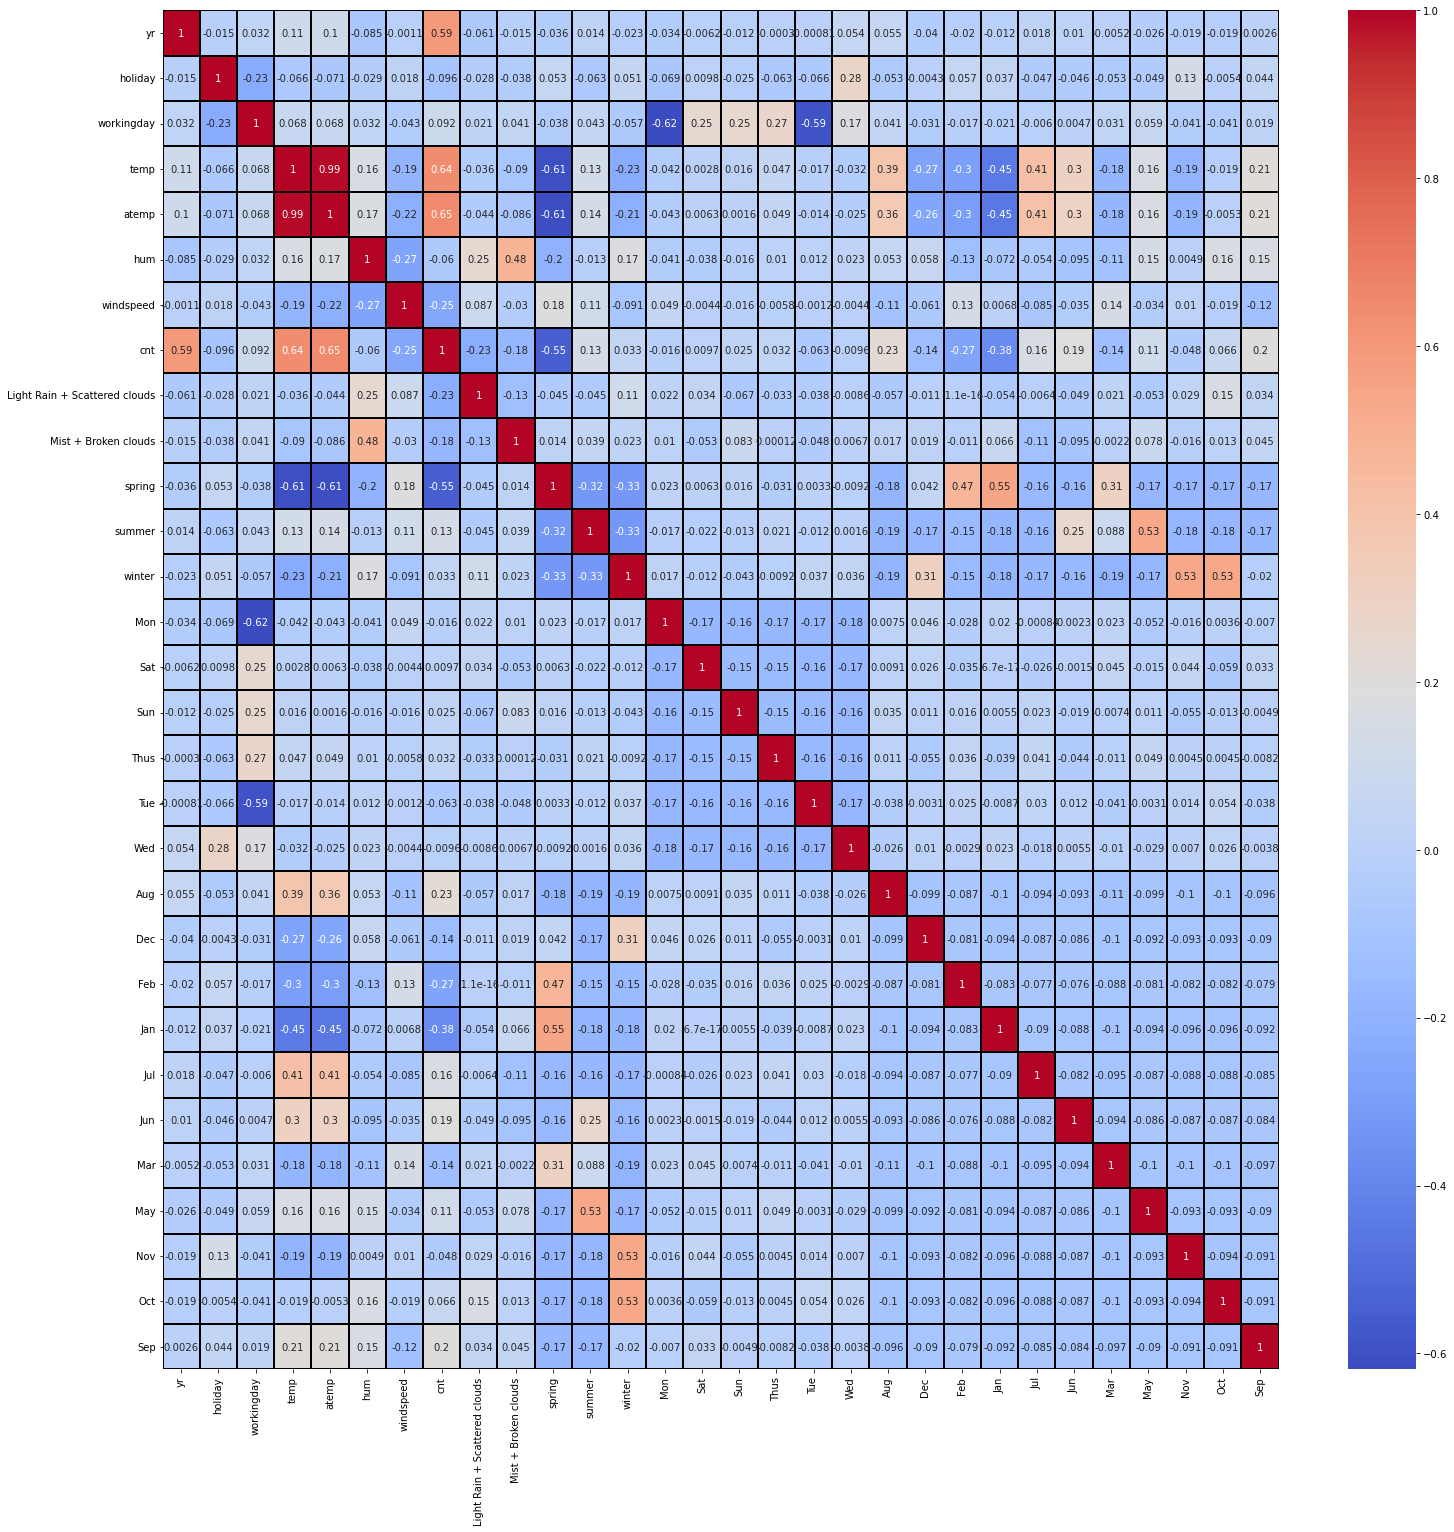

In [55]:
plt.figure(figsize=(25,25))
sns.heatmap(bike_train.corr(), cmap="coolwarm", annot=True, linecolor="black", linewidths=1)
plt.show()

There is multi-colinearity between the variables, but while building model will use **RFE** to auto-remove it.
*****

## Step 5: Building a linear model
- Dividing the train dataset to X and y

In [56]:
# Getting X and y for train data set
y_train = bike_train.pop('cnt')
X_train = bike_train

In [57]:
print(X_train.shape, y_train.shape)

(510, 29) (510,)


*****
#### RFE (Recursive feature elimination)
- We have around 30 columns, so it's better to use Auto elimination till 18 variable

In [58]:
# importing RFE and LinearRegression model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [59]:
# loading LinearRegression object
lr = LinearRegression()

In [60]:
# fitting the X and y data of train set
lr.fit(X_train, y_train)

LinearRegression()

In [61]:
# applying RFE to auto eliminate till 18 variable
rfe = RFE(lr, 18)
rfe = rfe.fit(X_train, y_train)

In [62]:
# making a list of column names, support and ranking of RFE
rfe_list = list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [63]:
# converting the list to df and sorting by rank
rfe_df = pd.DataFrame(rfe_list, columns=["name", "support", "rank"])
rfe_df.sort_values(by = "rank")

,name,support,rank
0,yr,True,1
26,Nov,True,1
22,Jul,True,1
21,Jan,True,1
20,Feb,True,1
19,Dec,True,1
12,Mon,True,1
11,winter,True,1
10,summer,True,1
28,Sep,True,1


In [64]:
# counting all rank 1
rfe_df[rfe_df['rank'] == 1].shape[0]

18

In [65]:
# printing only rfe supported columns
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Light Rain + Scattered clouds', 'Mist + Broken clouds', 'spring',
       'summer', 'winter', 'Mon', 'Dec', 'Feb', 'Jan', 'Jul', 'Nov', 'Sep'],
      dtype='object')

*****
### Building model using statsmodel, for the detailed statistics
#### Model 1:

In [66]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [67]:
# Importing statsmodels.api
import statsmodels.api as sm
# Adding a constant variable to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)

In [68]:
# fitting y_train and X_train_rfe to api 
model = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [69]:
#Let's see the summary of our linear model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 07 Nov 2021   Prob (F-statistic):          3.55e-190
Time:                        16:20:03   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

`Feb` is having high p-value and we will check VIF for it

In [70]:
# Removing const from X_train_rfe
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [71]:
# importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
# Printing VIF values 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,31.76
3,temp,19.75
8,spring,5.61
2,workingday,5.38
5,windspeed,4.79
10,winter,4.12
9,summer,2.88
14,Jan,2.40
7,Mist + Broken clouds,2.33
0,yr,2.10


`hum`, `temp`, and `spring` has high VIF value but `Feb`  have less
#### But our rule for removing varaible is:
1. Both VIF(5+) and P-value(0.05+) is high:
    - If p-value is high and VIF value is high then remove it.
2. High-low:
    - If p-value is high and VIF value is low then remove it.
    - If p-value is low and VIF value is high then remove it.
3. Both VIF(5<) and P-value(0.05<) is Low:
    - We keep the variable.

However, `Feb` is having high p-value and low VIF, so we will remove it.
*****

#### Model 2:

In [73]:
# dropping Feb column
X_train_rfe = X_train_rfe.drop('Feb', axis=1)
X_train_rfe.head()
print(X_train_rfe.shape)

(510, 17)


In [74]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)
model = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [75]:
#Let's see the summary of our linear model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Sun, 07 Nov 2021   Prob (F-statistic):          9.55e-191
Time:                        16:20:03   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

- We have some P-vlaue high, specially `holiday` and first, we will check VIF value

In [76]:
# Removing const from X_train_rfe
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [77]:
# Printing VIF values 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,31.16
3,temp,19.14
2,workingday,5.37
5,windspeed,4.78
8,spring,4.57
10,winter,4.12
9,summer,2.87
7,Mist + Broken clouds,2.32
0,yr,2.09
11,Mon,2.00


- `hum` have highest VIF but `holiday` have high p-value, so will remove it

In [78]:
# dropping holiday column
X_train_rfe = X_train_rfe.drop(['holiday'], axis=1)

*****
#### Model 3

In [79]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)
model = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [80]:
#Let's see the summary of our linear model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sun, 07 Nov 2021   Prob (F-statistic):          4.53e-191
Time:                        16:20:03   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

- Now we have low p-value less than 0.03 which is good. 

In [81]:
# Removing const from X_train_rfe
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [82]:
# Printing VIF values 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.14
2,temp,18.94
4,windspeed,4.77
1,workingday,4.76
7,spring,4.50
9,winter,4.11
8,summer,2.86
6,Mist + Broken clouds,2.32
0,yr,2.09
10,Mon,1.86


- `hum` and `temp` have high VIF values. so will remove `hum`

In [83]:
# dropping hum column
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

*****
#### Model 4

In [84]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)
model = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [85]:
#Let's see the summary of our linear model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Sun, 07 Nov 2021   Prob (F-statistic):          5.71e-189
Time:                        16:20:03   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

- we have all p-value less than 0.03 and Adj. R-squared: 0.840

In [86]:
# Removing const from X_train_rfe
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [87]:
# Printing VIF values 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.92
1,workingday,4.73
3,windspeed,4.71
6,spring,3.09
8,winter,3.02
7,summer,2.32
0,yr,2.08
9,Mon,1.86
13,Nov,1.78
11,Jan,1.67


- Now we have `temp`, `workingday`, `windspeed` around 5+ VIF, as pirorty we will save `temp` cause it shows high correlation with `cnt` in EDA
- So will remove `workingday`.

In [88]:
# dropping workingday column
X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

******
#### Model 5

In [89]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)
model = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [90]:
#Let's see the summary of our linear model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     181.9
Date:                Sun, 07 Nov 2021   Prob (F-statistic):          8.80e-185
Time:                        16:20:03   Log-Likelihood:                 501.44
No. Observations:                 510   AIC:                            -972.9
Df Residuals:                     495   BIC:                            -909.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

- Mon have high p-values around 0.04, and will also check VIF value

In [91]:
# Removing const from X_train_rfe
X_train_rfe_final = X_train_rfe.drop(['const'], axis=1)

In [92]:
# Printing VIF values 
vif = pd.DataFrame()
X = X_train_rfe_final
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.19
2,windspeed,4.69
7,winter,2.94
5,spring,2.88
6,summer,2.23
0,yr,2.07
12,Nov,1.77
10,Jan,1.66
11,Jul,1.59
4,Mist + Broken clouds,1.56


- Drop `Mon`

In [93]:
# dropping workingday column
X_train_rfe = X_train_rfe.drop(['Mon'], axis=1)

******
#### Model 6

In [94]:
# Adding a constant variable
model = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [95]:
#Let's see the summary of our linear model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.3
Date:                Sun, 07 Nov 2021   Prob (F-statistic):          5.10e-185
Time:                        16:20:03   Log-Likelihood:                 499.26
No. Observations:                 510   AIC:                            -970.5
Df Residuals:                     496   BIC:                            -911.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

- `summer` p-values is high as 0.038, and will also check VIF value

In [96]:
# Removing const from X_train_rfe
X_train_rfe_final = X_train_rfe.drop(['const'], axis=1)

In [97]:
# Printing VIF values 
vif = pd.DataFrame()
X = X_train_rfe_final
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.17
2,windspeed,4.67
7,winter,2.94
5,spring,2.88
6,summer,2.23
0,yr,2.07
11,Nov,1.77
9,Jan,1.66
10,Jul,1.59
4,Mist + Broken clouds,1.56


- Dropping summer

In [98]:
# dropping workingday column
X_train_rfe = X_train_rfe.drop(['summer'], axis=1)

******
#### Model 7

In [99]:
# Adding a constant variable
model = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [100]:
#Let's see the summary of our linear model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.7
Date:                Sun, 07 Nov 2021   Prob (F-statistic):          2.97e-185
Time:                        16:20:04   Log-Likelihood:                 497.03
No. Observations:                 510   AIC:                            -968.1
Df Residuals:                     497   BIC:                            -913.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

- All p-values are lower thn 0.03, so will check VIF value

In [101]:
# Removing const from X_train_rfe
X_train_rfe_final = X_train_rfe.drop(['const'], axis=1)

In [102]:
# Printing VIF values 
vif = pd.DataFrame()
X = X_train_rfe_final
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.66
2,windspeed,4.05
6,winter,2.54
5,spring,2.35
0,yr,2.06
10,Nov,1.77
8,Jan,1.65
4,Mist + Broken clouds,1.53
7,Dec,1.46
9,Jul,1.36


- Here, we can see all `VIF` value is lower than five and `p-value` lower than 0.03.
- This model is looking good and seems to have `low Multicollinearity`.
- So, we will keep, and if the **test result gives poor result**, then we have to **retrain it because of overfitting**.

****
#### Hypothesis Testing :
- `H0`: B1 = B2 = B3... = Bn
- `H1`: Atleast one of the Betha is not 0

In [103]:
# getting the parameters or coefficients of the model.
model.params

const                            0.289559
yr                               0.235183
temp                             0.400700
windspeed                       -0.155351
Light Rain + Scattered clouds   -0.291683
Mist + Broken clouds            -0.079767
spring                          -0.106410
winter                           0.064733
Dec                             -0.052012
Jan                             -0.056864
Jul                             -0.063100
Nov                             -0.056717
Sep                              0.049740
dtype: float64

- Here, we can see that all the `Betha is not 0`, hence proved `null hypothesis is false`.
****

#### R-square value:
- R-squared: 0.834
- Adj. R-squared: 0.830
*****
#### F-Staitsics:
- F-Statistics is used for testing the overall significance of the Model. The higher the F-Statistics, the more significant the Model is.
- F-statistic: 208.7
- Prob (F-statistic): 2.97e-185
****

#### The equation of best fitted surface based on final model is:
**cnt = 0.289559 + (0.235183 x yr) + (0.400700 x temp) + (-0.155351 x windspeed) + (-0.291683 x "Light Rain + Scattered clouds") + (-0.079767 x "Mist + Broken clouds") + (-0.106410 x spring) + (0.064733 x winter) + (-0.052012 x Dec) + (-0.056864 x Jan) + (-0.063100 x Jul) + (-0.056717 x Nov) + (0.049740 x Sep)**
*****

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [104]:
X_train_rfe.head()

,const,yr,temp,windspeed,Light Rain + Scattered clouds,Mist + Broken clouds,spring,winter,Dec,Jan,Jul,Nov,Sep
653,1.0,1,0.509887,0.300794,0,0,0,1,0,0,0,0,0
576,1.0,1,0.815169,0.264686,0,0,0,0,0,0,1,0,0
426,1.0,1,0.442393,0.255342,0,1,1,0,0,0,0,0,0
728,1.0,1,0.245101,0.663106,0,0,1,0,1,0,0,0,0
482,1.0,1,0.395666,0.188475,0,1,0,0,0,0,0,0,0


In [105]:
X_train_rfe.shape

(510, 13)

In [106]:
# Predicting the X_train_rfe data to get y_train_predict
y_train_predict = model.predict(X_train_rfe)

****
#### Normality of Errors:

<Figure size 432x288 with 0 Axes>

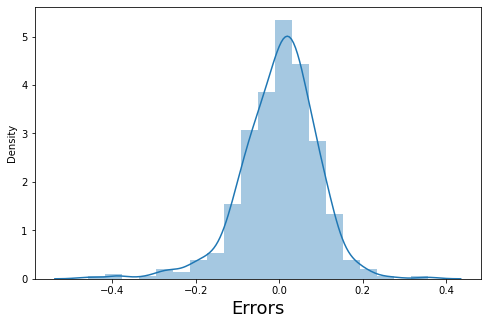

In [107]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (8,5))
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

*****
#### Error are independent of each other:

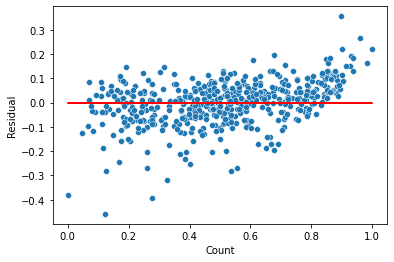

In [108]:
residual = y_train - y_train_predict #getting residual
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- There is **no visible pattern** in residual values. 
*****

### Linear Relationship between X and y
a. For Windspeed

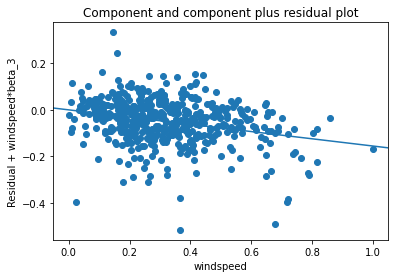

In [119]:
sm.graphics.plot_ccpr(model, 'windspeed')
plt.show()

b. For Temp

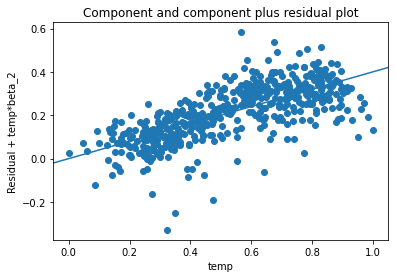

In [120]:
sm.graphics.plot_ccpr(model, 'temp')
plt.show()

Here we can see that there is **Linear Relationship between X and y.**

## Step 8: Making Predictions Using the Final Model

In [109]:
# scaling (min-max) on test dataset
num_vars = ['temp', 'hum', 'windspeed', 'atemp', 'cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light Rain + Scattered clouds,Mist + Broken clouds,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,0,0,1,0,0,0,0,0


In [110]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light Rain + Scattered clouds,Mist + Broken clouds,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.027397,0.319635,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.163612,0.467403,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


******
#### Dividing into X_test and y_test

In [111]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [112]:
new_col = X_train_rfe_final.columns # getting the final columns of X_train 
X_test = X_test[new_col] # using taht new_col list to filter the X_test data 
X_test.head()

,yr,temp,windspeed,Light Rain + Scattered clouds,Mist + Broken clouds,spring,winter,Dec,Jan,Jul,Nov,Sep
184,0,0.831783,0.084219,0,1,0,0,0,0,1,0,0
535,1,0.901354,0.153728,0,0,0,0,0,0,0,0,0
299,0,0.511964,0.334206,0,1,0,1,0,0,0,0,0
221,0,0.881625,0.339570,0,0,0,0,0,0,0,0,0
152,0,0.817246,0.537414,0,0,0,0,0,0,0,0,0


In [113]:
# adding constant to X_test
X_test = sm.add_constant(X_test)
X_test.describe()

,const,yr,temp,windspeed,Light Rain + Scattered clouds,Mist + Broken clouds,spring,winter,Dec,Jan,Jul,Nov,Sep
count,219.0,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,1.0,0.479452,0.558941,0.313350,0.027397,0.319635,0.255708,0.232877,0.086758,0.077626,0.105023,0.073059,0.086758
std,0.0,0.500722,0.233698,0.159947,0.163612,0.467403,0.437258,0.423633,0.282125,0.268194,0.307285,0.260830,0.282125
min,1.0,0.000000,0.046591,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.354650,0.198517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,0.558691,0.299459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,0.759096,0.403048,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,1.000000,0.984424,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
# Predicting X_test using the prevouse model trained using X_train
y_predict = model.predict(X_test)

------

## Step 8: Model Evaluation
- Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

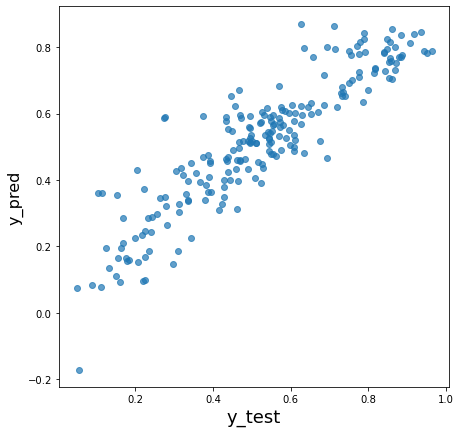

In [115]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_predict, alpha = 0.7)
fig.suptitle('y_test vs y_predict', fontsize = 20)          # Plot heading 
plt.xlabel('y_test', fontsize = 18)                         # X-label
plt.ylabel('y_pred', fontsize = 16)   

*****
#### R2 Value Calculation for bike_test dataframe

In [116]:
# importing r2_score
from sklearn.metrics import r2_score

In [117]:
r2 = round(r2_score(y_test, y_predict),3) # getting r2_score of y_test and y_predict
r2

0.816

*****
#### Adjusted R2 Value Calculation for bike_test dataframe

In [118]:
# n is number of rows in test dataset
n = X_test.shape[0]

# p/predictors is the number of features 
p = X_test.shape[1]

# adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),3)
adjusted_r2

0.804

#### R-square value: 
- **For test:**
    - R-squared: 0.816
    - Adj. R-squared: 0.804
*****

### The equation of best fitted surface based on final model is:
**cnt = 0.289559 + (0.235183 x yr) + (0.400700 x temp) + (-0.155351 x windspeed) + (-0.291683 x "Light Rain + Scattered clouds") + (-0.079767 x "Mist + Broken clouds") + (-0.106410 x spring) + (0.064733 x winter) + (-0.052012 x Dec) + (-0.056864 x Jan) + (-0.063100 x Jul) + (-0.056717 x Nov) + (0.049740 x Sep)**

1. `const`: `0.289559`
    - This means, when the absence of other predictor variables, the bike rental can still be increased by a `0.289559` unit.
2. `yr` : `0.235183`
    - This means, when the absence of other predictor variables, the bike rental can still be increased by a `0.235183` unit.
3. `temp ` : `0.400700`
    - This means, when the absence of other predictor variables, the bike rental can still be increased by a `0.400700` unit.
4. `windspeed ` : `-0.155351`
    - This means, when the absence of other predictor variables, the bike rental can still be deceased by a `0.155351` unit.
5. `Light Rain + Scattered clouds` : `-0.291683` 
    - This means, when the absence of other predictor variables, the bike rental can still be decreased by a ` 0.291683` unit.
6. `Mist + Broken clouds` : `-0.079767` 
    - This means, when the absence of other predictor variables, the bike rental can still be increased by a `0.079767` unit.
7. `spring ` : `-0.106410`
    - This means, when the absence of other predictor variables, the bike rental can still be decreased by a `0.106410` unit.
8. `winter ` : `0.064733`
    - This means, when the absence of other predictor variables, the bike rental can still be increased by a `0.064733` unit.
9. `Dec` : `-0.052012`
    - This means, when the absence of other predictor variables, the bike rental can still be decreased by a `0.052012` unit.
10. `Jan` : `-0.056864`
    - This means, when the absence of other predictor variables, the bike rental can still be decreased by a `0.056864` unit.
11. `Jul`: `-0.063100`
    - This means, when the absence of other predictor variables, the bike rental can still be decreased by a `0.063100` unit.
12. `Nov` : `-0.056717`     
    - This means, when the absence of other predictor variables, the bike rental can still be decreased by a `0.056717` unit.
13. `Sep` : `0.049740`:
    - This means, when the absence of other predictor variables, the bike rental can still be increased by a `0.049740` unit.
****

## Final Result:
1. **R-square value:**
    a. **For train:**
        - R-squared: 0.834
        - Adj. R-squared: 0.830
    b. **For test:**
        - R-squared: 0.816
        - Adj. R-squared: 0.804
    c. Difference between train and test R-square value is 0.834-0.816 = 0.018 (1.8%)
    d. Difference between train and test Adj. R-squared value is 0.830-0.804 = 0.026 (2.6%)
2. `Temperature` shows the highest coefficient of around 0.400700, which means when the `temp` is increased by one unit, the rental bike increases by 0.400700
3. `Light Rain + Scattered clouds` shows a negative coefficient of around 0.291683; this means when `this variable` increases by one unit, the rental bike will decrease by 0.291683.
4. `yr` shows the 2nd  highest coefficient of around 0.235183, which means when the `yr` is increased by one unit, the rental bike increases by 0.235183
5. `windspeed` shows a second highest negative coefficient of around 0.155351; this means when `windspeed` variable increases by one unit, the rental bike will decrease by 0.155351.
6. `spring` shows a third highest negative coefficient of around 0.106410; this means when `spring` variable increases by one unit, the rental bike will decrease by 0.106410.
****

## Business Goals:
1. If the `temperature` is highly correlated and hiving a high coefficient with `cnt,` but we know from `EDA` that if the temperature goes higher than 35, we see fewer bikes rented. So they should know that when the temperature is between `20-35`, there will be more people renting bikes. 
2. If the weather is like `Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds,` then people tend to rent bikes less. 
3. The windspeed shows a negative coefficient with `y or cnt,` but we need to know when wind speed is between `5-20` then people rent more bikes through EDA, but we have to know that wind speed above will always affect.
4. `spring` shows a negative coefficient with `y or cnt,` so we should offer more in `spring.`
5. The business  has increased from 2018 to 2019 so that's why it show high coefficient with `y or cnt`.